In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from doodle_parsing_utils import *
import re
import clip
import torch
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from typing import List, Tuple

In [3]:
example_data = np.load("./dataset/sketchrnn_apple.full.npz", encoding='latin1', allow_pickle=True)

In [4]:
len(example_data["train"])

127188

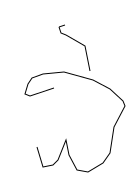

In [5]:
import random
draw_strokes(random.choice(example_data['train']), factor=1)

In [8]:
from doodle_dataset import DoodleDataset
from pathlib import Path
from doodle_dataset import encode_stroke_data, decode_stroke_data

train_dataset = DoodleDataset(
    data_dir=Path("./dataset"),
    split="train",
    block_size=32,
    scaled_size=200,
    device="cuda",
)

Preprocessing Data:


1it [00:02,  2.77s/it]

Calculating CLIP Embeddings


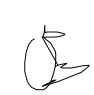

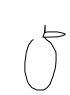

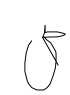

In [ ]:
idx = random.randint(0, len(train_dataset))
x, y, classname_embedding = train_dataset[idx]

x_decoded = decode_stroke_data(x)
draw_strokes(x_decoded, factor=3)

y_decoded = decode_stroke_data(y)
draw_strokes(y_decoded, factor=3)

In [ ]:
mean = np.array([1.1523420567837017, -1.7892017952608004])
std = np.array([17.661761786706826, 19.484090706411575])

normalized_dataset = DoodleDataset(
    data_dir=Path("./dataset"),
    split="train",
    block_size=32,
    scaled_size=200,
    device="cuda",
    mean=mean,
    std=std,
)

idx = random.randint(0, len(normalized_dataset))
x, y, classname_embedding = normalized_dataset[idx]

Preprocessing Data:


1it [00:03,  3.03s/it]

Calculating CLIP Embeddings
